# Image classification using MNIST Data

- Load the dataset 
- Observe the shape of the data 
- View full image 
- Observe the pixel value 
- Model Building (usng FFNN - MLP acrhitecture)
- Evaluate the model 
- Performance analysis

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 

import numpy as np 
import pandas as pd

In [2]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

In [3]:
print(trainX.shape)   # Total of 60000 Images each witih size 28x28 pixels  
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
np.set_printoptions(linewidth=200)
trainX[0]    # Displaying the pixels 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

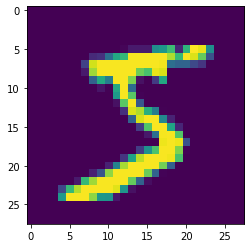

In [5]:
# Display the pattern from above

plt.imshow(trainX[0])

In [6]:
trainY[0]

5

## Convert the output labels to Multiple Values 

- Applying one-hot Enconding 
- This will help us to locate the digit in the array, as our result will be array of probablities and we need to choose the position with the highest probablity 


In [7]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
trainY[323]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Build the graph

In [9]:
tf.keras.backend.clear_session()    # To remove the default graph if any 


#Initialize Sequential model
model = tf.keras.models.Sequential()



# Reshape the data from 2D to 1D, ie, 28x28 to 784
# Use the reshape() or use flatten() also
# This is because NN cannot handle 2D data. It should be always be 1D vector



model.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))



# Normalize the data 
# Here, Batch Normalization takes a batch of the data and performs z-score normalization by taking the mean and std of the natch of the data 

#model.add(tf.keras.layers.BatchNormalization())



# Alternatively, The following code does Min-Max normalization :  
trainX, testX = trainX/255.0, testX/255.0

# Adding the first hidden layer 
model.add(tf.keras.layers.Dense(200, activation = 'sigmoid'))

# Adding the Second layer 
model.add(tf.keras.layers.Dense(100, activation = 'sigmoid'))

# Addign the Third Layer
model.add(tf.keras.layers.Dense(60, activation = 'sigmoid'))

model.add(tf.keras.layers.Dense(30, activation = 'sigmoid'))


# Adding the OUTPUT LAYER 
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
__________________________________________________

# Compile the graph

In [11]:
# Creatae the optiizer ith non defaut learning rate 
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)

#Compile the model 
model.compile(optimizer = sgd_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'] )


# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

# Train the model

- Batch size is given as 32
- so, total number of batches = 60000/32 = 1875
- In one epoch, the graph will iterate for 1875 times (total number of iterations for one epoch)
- Total of 30 epoch, So, the graph wil run for 1875*30 = 56250 times 

In [12]:
model.fit(trainX, trainY, validation_data = (testX, testY), epochs = 30, batch_size = 32)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026 - accuracy: 0.1116 - val_loss: 2.2992 - val_accuracy: 0.1028
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2963 - accuracy: 0.1227 - val_loss: 2.2894 - val_accuracy: 0.1731
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2625 - accuracy: 0.1943 - val_loss: 2.1705 - val_accuracy: 0.2847
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8755 - accuracy: 0.3236 - val_loss: 1.6744 - val_accuracy: 0.3615
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4864 - accuracy: 0.4456 - val_loss: 1.2843 - val_accuracy: 0.5246
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1485 - accuracy: 0.5835 - val_loss: 1.0449 - val_accuracy: 0.6316
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9793 - accuracy: 0.6631 - val_loss: 0.9170 - val_accuracy:

# Evaluate Accuracy

Now compare how the model performs in the test data 

In [13]:
test_loss, test_acc = model.evaluate(testX, testY, verbose=2)

313/313 - 1s - loss: 0.1775 - accuracy: 0.9494


# Make predictions

- With the model trained, you can use it to make predictions about images 

In [14]:
predictions = model.predict(testX)

In [15]:
predictions[0]

array([1.3965452e-10, 7.8813976e-04, 6.3397297e-06, 4.8157576e-04, 6.1897020e-07, 3.9065949e-08, 1.4500855e-09, 9.9665558e-01, 1.4329449e-06, 2.0662353e-03], dtype=float32)

In [16]:
import numpy as np

In [17]:
np.argmax(predictions[0])   # To get the highest probablity value from the 'predictions[0]'

7

In [18]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

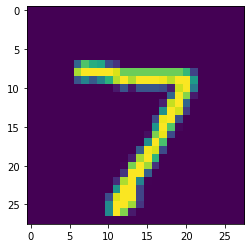

In [19]:
plt.imshow(testX[0])

# Creation of confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [23]:
y_pred = np.argmax(predictions, axis = 1)
y_test = np.argmax(testY, axis = 1)

In [24]:
confusion_matrix(y_test, y_pred)

array([[ 959,    0,    1,    0,    0,    7,    9,    1,    2,    1],
       [   0, 1105,    3,    4,    0,    1,    1,    0,   20,    1],
       [   8,    1,  975,    7,    8,    3,    7,    6,   16,    1],
       [   0,    0,    9,  953,    0,   30,    0,    5,   10,    3],
       [   0,    0,    1,    0,  951,    1,   12,    0,    5,   12],
       [   8,    0,    4,    6,    3,  853,    4,    0,   12,    2],
       [   8,    2,    5,    0,    9,    9,  922,    0,    3,    0],
       [   1,   17,   14,    5,    0,    1,    0,  942,    2,   46],
       [   0,    2,    3,    4,    6,   22,    6,    1,  924,    6],
       [   0,    2,    3,    4,   44,   20,    1,    9,   16,  910]], dtype=int64)

In [25]:
testY

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
predictions

array([[1.3965452e-10, 7.8813976e-04, 6.3397297e-06, ..., 9.9665558e-01, 1.4329449e-06, 2.0662353e-03],
       [1.1382798e-04, 1.8743147e-03, 9.6286225e-01, ..., 6.6114380e-06, 3.2758396e-02, 2.5169145e-05],
       [8.8337448e-10, 9.8765147e-01, 8.8622636e-04, ..., 5.6193648e-03, 8.1001077e-04, 7.7118959e-05],
       ...,
       [2.1139425e-07, 3.1625742e-08, 5.1187842e-05, ..., 6.9728048e-06, 6.4596301e-04, 2.9257960e-03],
       [2.0875046e-03, 7.2654495e-07, 8.4845291e-05, ..., 4.9499324e-08, 7.0315846e-03, 4.3853499e-05],
       [2.8623068e-03, 1.5959646e-10, 2.5271502e-04, ..., 2.1132633e-08, 5.0039675e-06, 2.3167133e-06]], dtype=float32)